In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
from sklearn.model_selection import train_test_split


class data_loader:
    
    def __init__(self, dataset_path, vis=False):
        """
        Initialize the data_loader class
        Args:
            dataset_path(str): the dataset object address
        """
        
        self.dataset_path = dataset_path
        self.is_vis = vis
        
        # The list that use to translate the label to defects type
        self.label_keys = ["Center, ", "Donut, ", "Edge_Loc, ", "Edge_Ring, ", 
                           "Loc, ", "Near_Full, ", "Scratch, ", "Random, "]

    def load_data(self):
        """
        Load data to the vaiable "self.train" and "self.label"  
        """
        
        self.data = np.load(self.dataset_path)
        self.train = self.data["arr_0"]
        self.label = self.data["arr_1"]
        
        print("MixedWM38:", np.shape(self.label)[0], 'wafer loaded')
        
    def prep_data(self):
        """
        Do train_test_split and format the data
        """
        
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.train, 
                                                                                self.label, 
                                                                                test_size = 0.2,
                                                                                random_state= 42)
        
        
        self.x_train = np.expand_dims(self.x_train, axis=1).astype(np.float32)
        self.x_test = np.expand_dims(self.x_test, axis=1).astype(np.float32)
        
        self.x_train = torch.from_numpy(self.x_train)
        self.x_test = torch.from_numpy(self.x_test)

        self.y_train = torch.from_numpy(self.y_train).long()
        self.y_test = torch.from_numpy(self.y_test).long()

    
    def read_label(self, label, defect_types =''):
        """
        Translate the label into defect_types
        Args:
            label(list): the label that indicate type of  defect, 
                         for instance [0 1 0 1 0 0 0 1]
        return::
            defect_types(str): the string that indicate defect type
        """
       
        if np.sum(label) == 0:
            defect_types = 'Normal wafer'
        
        else:
            for digit in range(np.shape(label)[0]):

                if label[digit] == 1:

                    defect_types = defect_types + self.label_keys[digit]  
        
        return defect_types
    
    def see_wafer(self, wafer_num):
        """
        See the defect pattern in idicated by wafer number
        Args:
            wafer_num(float): the index of loaded data in self.train

        return:
            plot(oject): the plot image
        """
        
        defect_types = self.read_label(self.label[wafer_num])
        
        plt.title("wafer #"+str(wafer_num))
        plt.imshow(self.train[wafer_num])
        plt.colorbar()
        plt.show()
        
        print("Defect types=", defect_types)
        print("Labeled as:", self.label[wafer_num])
        
    def get_data(self):
        
        """
        Get the loaded data 

        return:
            x_train(array): image of defect pattern for model training
            x_test(array): image of defect pattern for model validation
            y_train(tensor): label of defect pattern for model training
            y_test(tensor): label of defect pattern for model validation
        """
            
        self.load_data()
        self.prep_data()
        
        return self.x_train, self.x_test, self.y_train, self.y_test

In [3]:
dataset_path = r'C://Users/isang/OneDrive/Desktop/WM/data/Wafer_Map_Datasets.npz'

A1 = data_loader(dataset_path, vis= True)
x_train, x_test, y_train, y_test = A1.get_data()

MixedWM38: 38015 wafer loaded


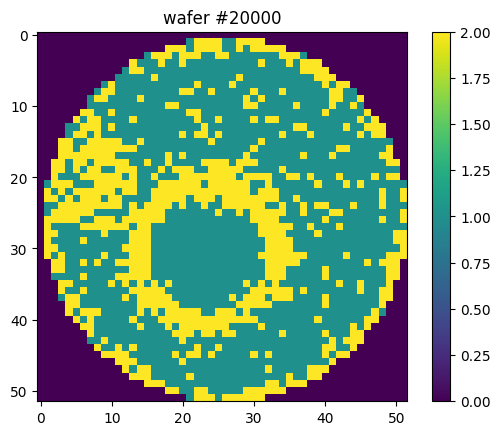

Defect types= Donut, Edge_Ring, Loc, 
Labeled as: [0 1 0 1 1 0 0 0]


In [4]:
A1.see_wafer(20000)

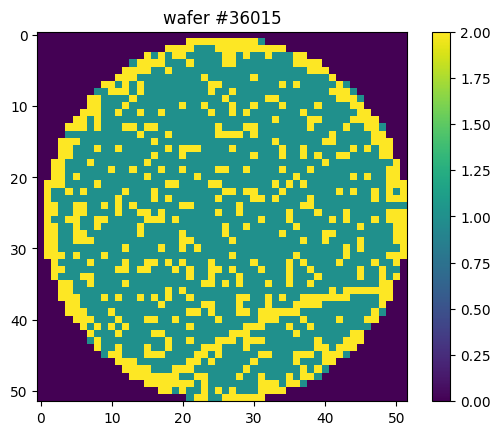

Defect types= Edge_Ring, Scratch, 
Labeled as: [0 0 0 1 0 0 1 0]


In [5]:
A1.see_wafer(36015)

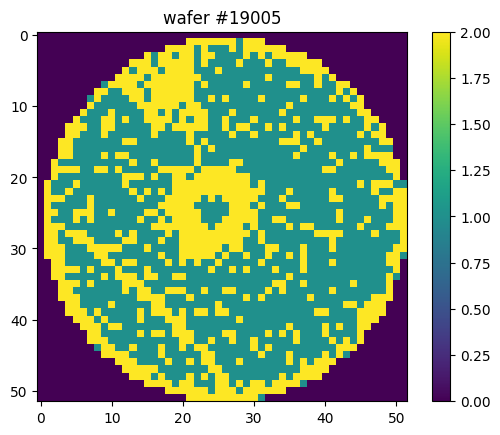

Defect types= Donut, Edge_Ring, Loc, Scratch, 
Labeled as: [0 1 0 1 1 0 1 0]


In [6]:
A1.see_wafer(19005)

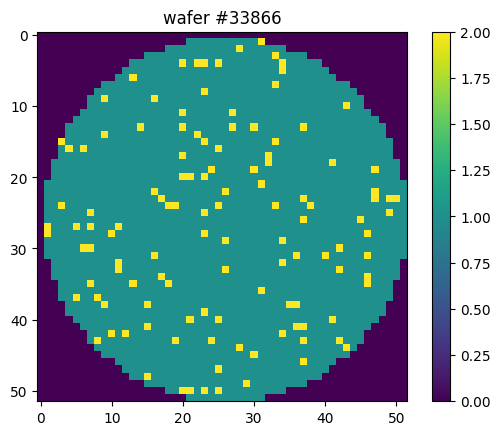

Defect types= Normal wafer
Labeled as: [0 0 0 0 0 0 0 0]


In [7]:
A1.see_wafer(33866)

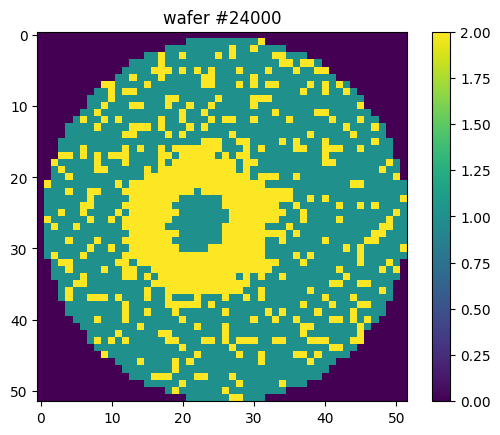

Defect types= Donut, 
Labeled as: [0 1 0 0 0 0 0 0]


In [9]:
A1.see_wafer(24000)